In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aasiasalahuddin","key":"2a9c04ddcf0d78b5db5fbb0c04d285e6"}'}

In [3]:
# Create a hidden directory named ".kaggle" in the home directory (if it doesn't already exist)
!mkdir -p ~/.kaggle
# Copy the kaggle.json file (which contains your Kaggle API credentials) to the .kaggle directory
!cp kaggle.json ~/.kaggle/
# Set file permissions of kaggle.json to read and write only for the user (for security)
!chmod 600 ~/.kaggle/kaggle.json
# Install the Kaggle Python package (quietly, without showing output)
!pip install -q kaggle
# Use the Kaggle CLI tool to download the GTSRB (German Traffic Sign Recognition Benchmark) dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
# Unzip the downloaded dataset file into a folder named "gtsrb_data"
!unzip -q gtsrb-german-traffic-sign.zip -d gtsrb_data


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 606M/612M [00:06<00:00, 153MB/s]
100% 612M/612M [00:06<00:00, 100MB/s]


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
data = []
labels = []
classes = 43
img_size = 32

dataset_path = "gtsrb_data/Train"

for i in range(classes):
    path = os.path.join(dataset_path, str(i))
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img_array, (img_size, img_size))
            data.append(resized_img)
            labels.append(i)
        except Exception as e:
            print(f"Error reading image: {e}")

X = np.array(data)
y = np.array(labels)

X = X / 255.0
y = to_categorical(y, classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step - accuracy: 0.2375 - loss: 2.8745 - val_accuracy: 0.8011 - val_loss: 0.7963
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6732 - loss: 1.0405 - val_accuracy: 0.9179 - val_loss: 0.3514
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.7888 - loss: 0.6533 - val_accuracy: 0.9393 - val_loss: 0.2372
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.8336 - loss: 0.5140 - val_accuracy: 0.9635 - val_loss: 0.1558
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.8703 - loss: 0.3978 - val_accuracy: 0.9726 - val_loss: 0.1139
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 77s 80ms/step - accuracy: 0.8915 - loss: 0.3334 - val_accuracy: 0.9760 - val_loss: 0.0969
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9107 - loss: 0.2813 - val_accuracy: 0.9788 - val_loss: 0.0869
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.9104 - loss: 0.2643 - 

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9899 - loss: 0.0405
Test Accuracy: 98.94%
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


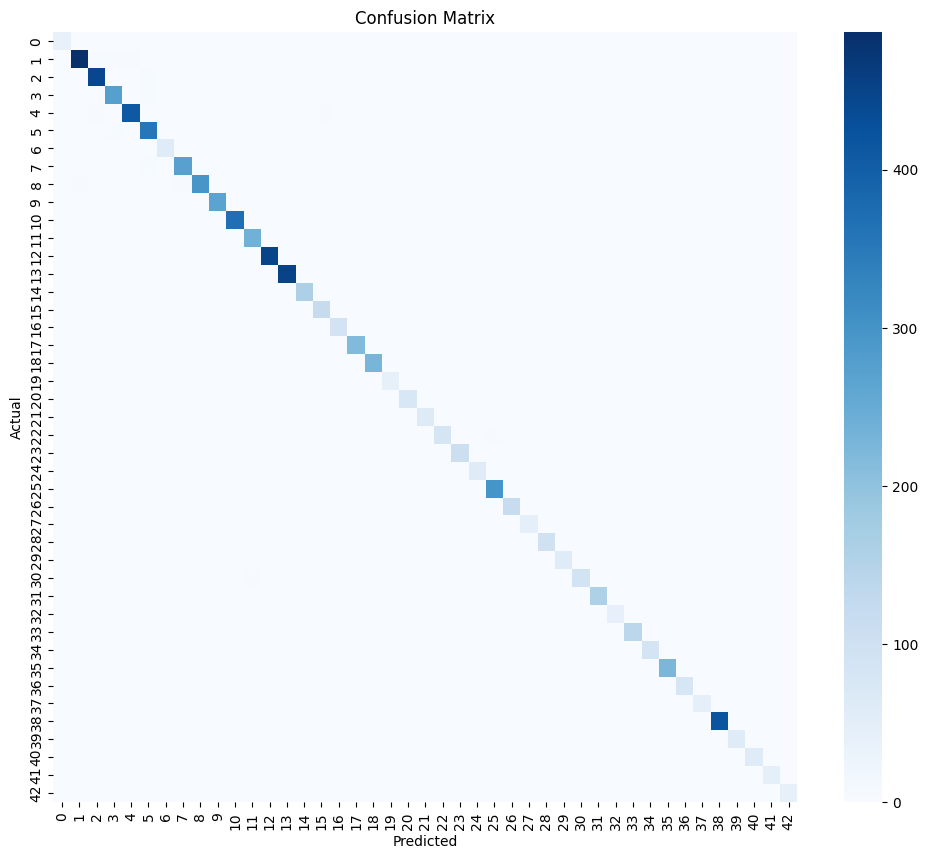

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      0.98      0.98       496
           2       0.98      0.99      0.99       450
           3       0.98      0.98      0.98       280
           4       0.99      0.98      0.99       418
           5       0.96      0.98      0.97       364
           6       0.98      1.00      0.99        59
           7       0.99      0.98      0.98       278
           8       0.99      0.98      0.99       301
           9       1.00      1.00      1.00       268
          10       0.99      0.99      0.99       370
          11       0.98      1.00      0.99       236
          12       1.00      1.00      1.00       450
          13       0.99      1.00      1.00       452
          14       1.00      0.99      1.00       162
          15       0.98      1.00      0.99       120
          16       1.00      1.00      1.00        90
          17       1.00    

In [8]:
#evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes))


In [9]:
model.save("gtsrb_traffic_sign_model.h5")

# To download the model to your system
from google.colab import files
files.download("gtsrb_traffic_sign_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>